# In-painting images using sparse repensentation

In [17]:
%matplotlib inline
import inpaint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import imread, imsave
sns.set_context('notebook')

In [18]:
orig_rgb = imread('./Test_Fig2_Missing.png');
origin = orig_rgb
inpainted_rgb = np.zeros(orig_rgb.shape)

In [19]:
for i in range(orig_rgb.shape[2]):
    orig = orig_rgb[:,:,i]
    m ,n =orig.shape
    missing = orig.copy()
    known_coords = np.where(missing != 0)
    ip = inpaint.Inpaint(verbose=True, store=True)
    painted, objective, iterates = ip.transform(missing, known_coords)
    orig = orig.astype(float) # cast back to floats for error norm calculation
    painted = painted.astype(float)
    inpainted_rgb[:,:,i] = painted


Iter: 0. Objective: 85.193765. Best objective: 85.193765.
Iter: 100. Objective: 15.157933. Best objective: 14.166519.
Iter: 200. Objective: 13.934466. Best objective: 13.674825.
Iter: 200. Final objective 13.934466. Best objective 13.674825.
Iter: 0. Objective: 57.725704. Best objective: 57.725704.
Iter: 100. Objective: 13.601138. Best objective: 12.495460.
Iter: 200. Objective: 12.267624. Best objective: 11.968353.
Iter: 200. Final objective 12.267624. Best objective 11.968353.
Iter: 0. Objective: 69.567668. Best objective: 69.567668.
Iter: 100. Objective: 12.408428. Best objective: 11.314784.
Iter: 200. Objective: 11.072787. Best objective: 10.780574.
Iter: 200. Final objective 11.072787. Best objective 10.780574.


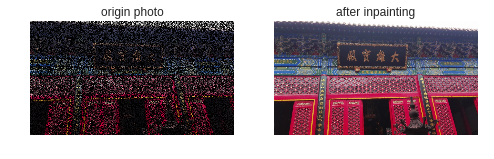

In [22]:
unknown_rgb = np.where(orig_rgb == 0)
final = orig_rgb
# overlay the unknown pixel with inpainted value, other original value keep
final[unknown_rgb] = inpainted_rgb[unknown_rgb]
# import matplotlib.image as mpimg
# mpimg.imsave("inpainted", final)
orig_rgb = imread('./Test_Fig2_Missing.png');
plt.subplot(121);plt.imshow(orig_rgb);plt.axis("off");plt.title("origin photo")
plt.subplot(122);plt.imshow(final);plt.axis("off");plt.title("after inpainting")